In [1]:
from generate_test_beam import generate_test_beam, generate_test_images

tensor([-25.], device='cuda:0') tensor(167.8961, device='cuda:0', dtype=torch.float64)
tensor([-18.6842], device='cuda:0') tensor(100.3928, device='cuda:0', dtype=torch.float64)
tensor([-12.3684], device='cuda:0') tensor(51.0326, device='cuda:0', dtype=torch.float64)
tensor([-6.0526], device='cuda:0') tensor(18.7766, device='cuda:0', dtype=torch.float64)
tensor([0.2632], device='cuda:0') tensor(2.6274, device='cuda:0', dtype=torch.float64)
tensor([6.5789], device='cuda:0') tensor(1.6277, device='cuda:0', dtype=torch.float64)
tensor([12.8947], device='cuda:0') tensor(14.8589, device='cuda:0', dtype=torch.float64)


C:\Users\Ryan Roussel\.conda\envs\phase_space_reconstruction\lib\site-packages\torch\functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


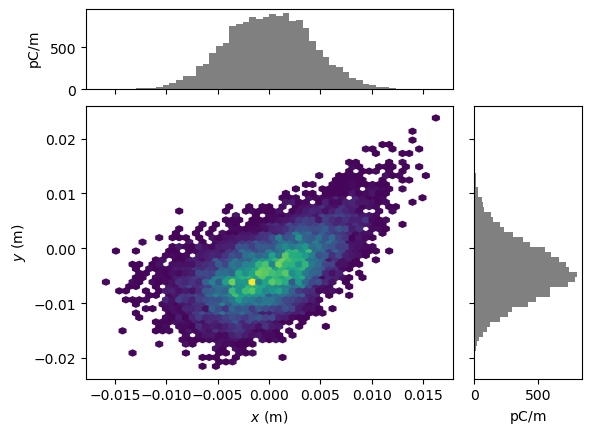

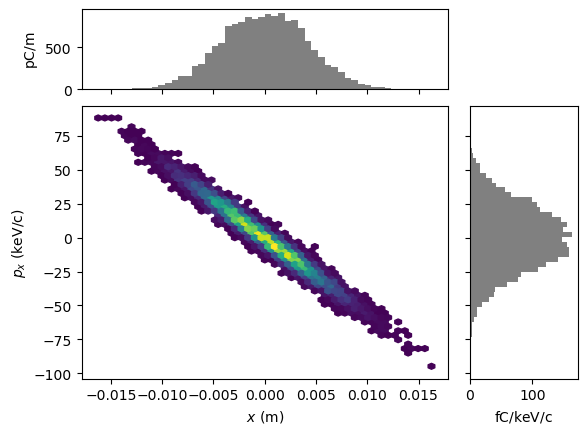

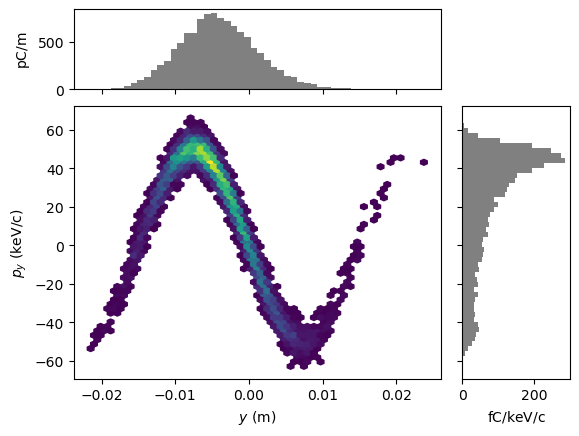

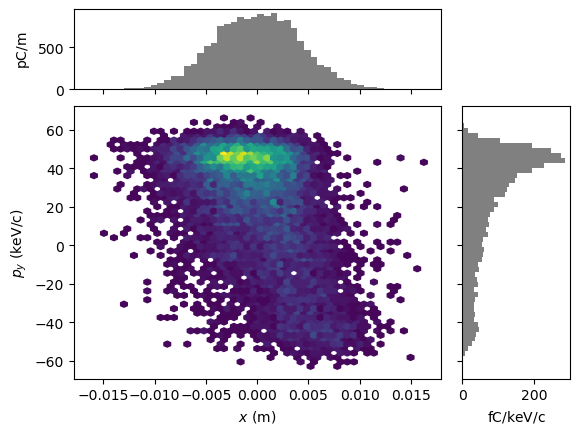

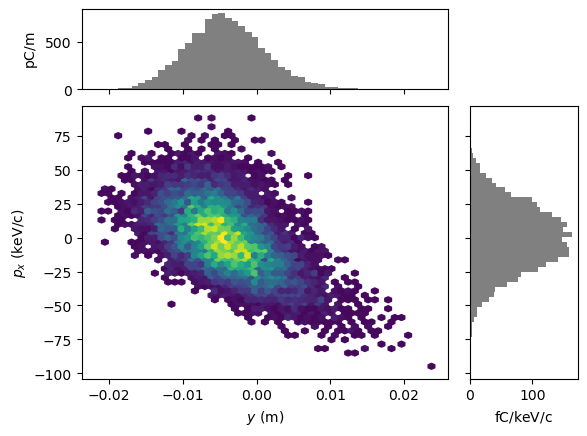

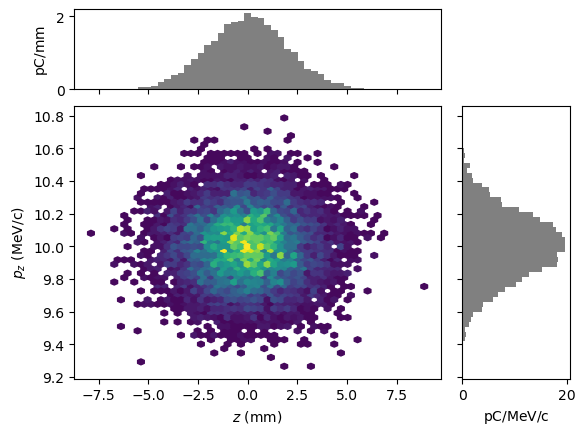

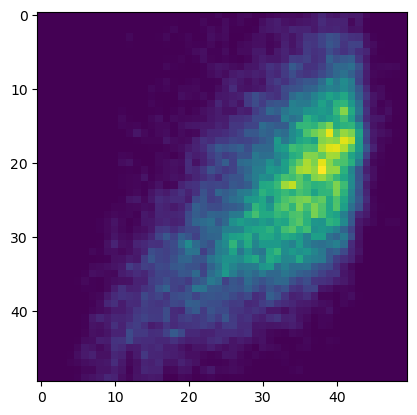

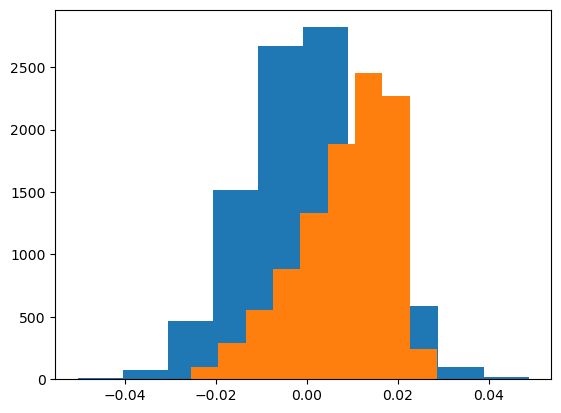

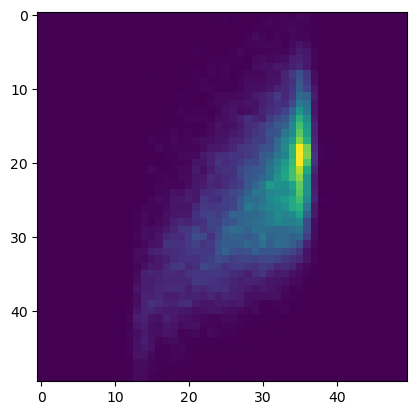

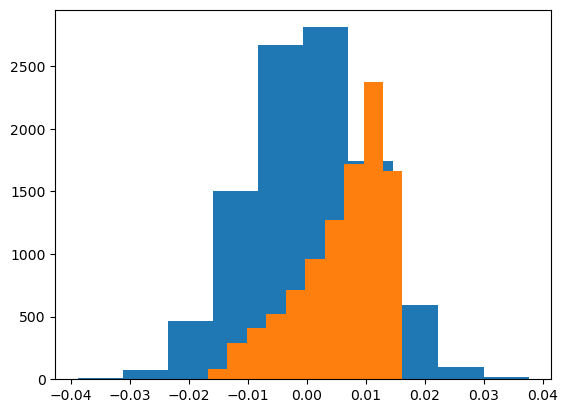

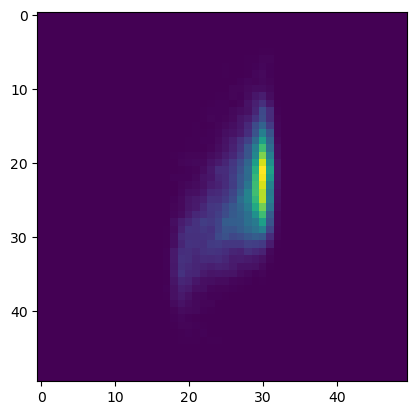

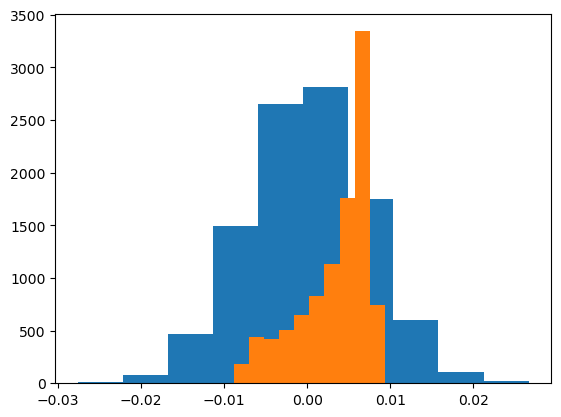

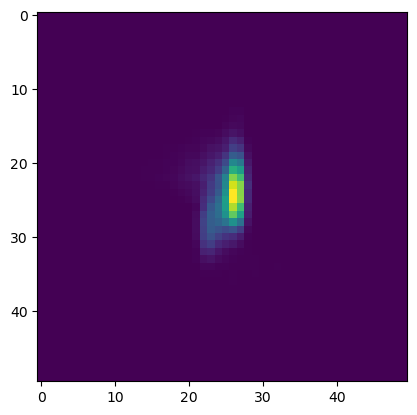

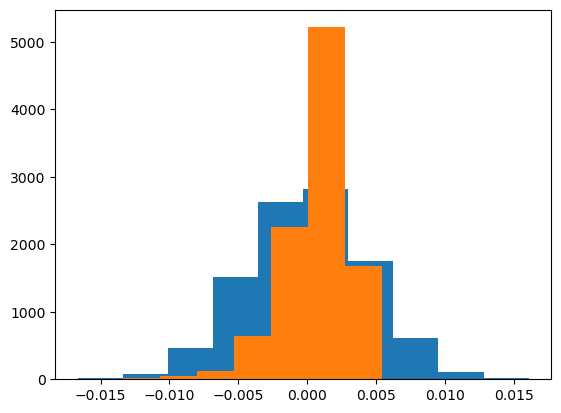

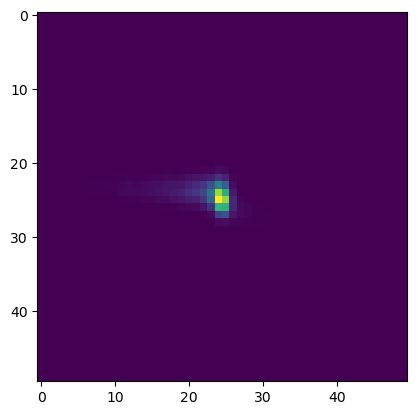

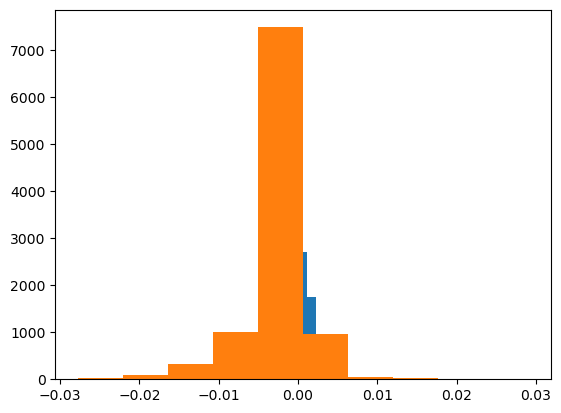

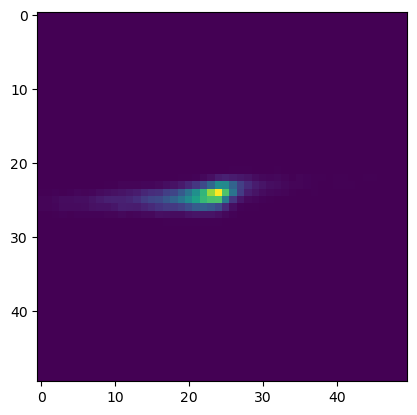

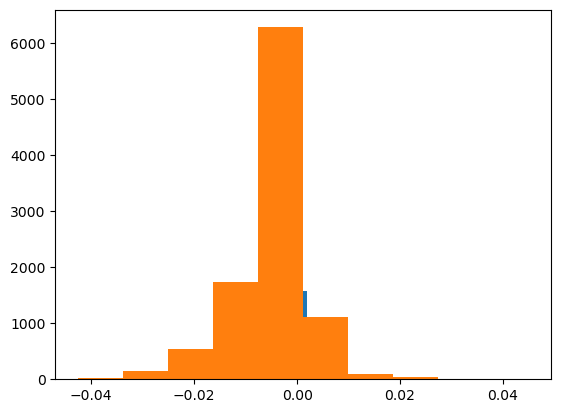

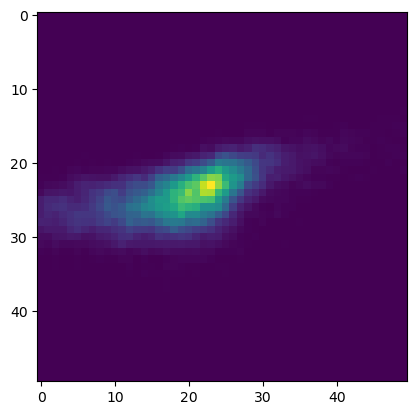

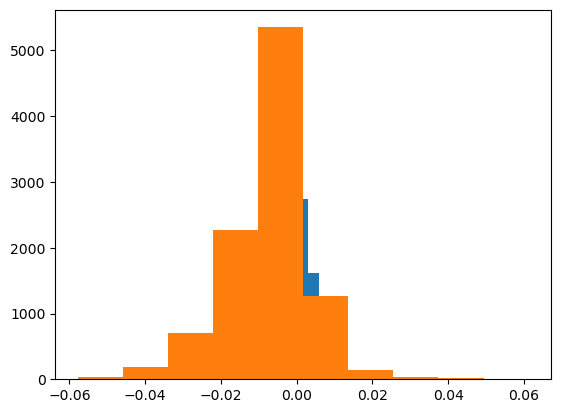

In [2]:
generate_test_images()

In [3]:
import torch
beam_coords = torch.load("ground_truth_dist.pt")
cov = torch.cov(beam_coords.T)

In [4]:
ycov = cov[2:4,2:4]
emit = torch.det(ycov).sqrt()
twiss = ycov / emit
print(f"emit {emit}")
print(f"beta {twiss[0,0]}")
print(f"alpha {-twiss[1,0]}")
print(f"gamma {twiss[1,1]}")

emit 1.1631703300222823e-05
beta 2.5213852251424367
alpha 0.9345128851556918
gamma 0.7429702981686145


In [5]:
xcov = cov[:2,:2]
emit = torch.det(xcov).sqrt()
twiss = xcov / emit
print(f"emit {emit}")
print(f"beta {twiss[0,0]}")
print(f"alpha {-twiss[1,0]}")
print(f"gamma {twiss[1,1]}")

emit 2.0069666722165463e-06
beta 8.969655764206761
alpha 4.983197429907035
gamma 2.879960759309761


In [6]:
beam_coords.shape

torch.Size([10000, 6])

In [7]:
bins = torch.load("bins.pt")

In [8]:
bins[1]-bins[0]

tensor(0.0012)

(array([  15.,  140.,  686., 1760., 2848., 2693., 1357.,  414.,   79.,
           8.]),
 array([-0.0735676 , -0.05835076, -0.04313392, -0.02791708, -0.01270024,
         0.00251659,  0.01773343,  0.03295027,  0.04816711,  0.06338395,
         0.07860079]),
 <BarContainer object of 10 artists>)

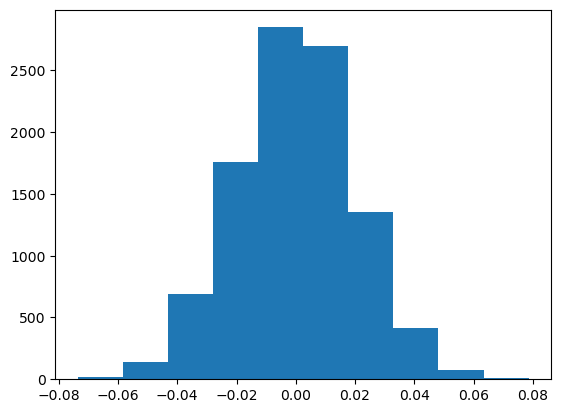

In [9]:
import matplotlib.pyplot as plt
plt.hist(beam_coords.T[-1].numpy())